In [1]:
from leicacam import CAM

In [2]:
cam = CAM()

- ** load leicaautomator-overview **
- ** turn on laser and set laser power **
- ** set aperture **
- ** adjust start position and size **
- ** run autofocus with 512x512 px **


In [3]:
from IPython import display

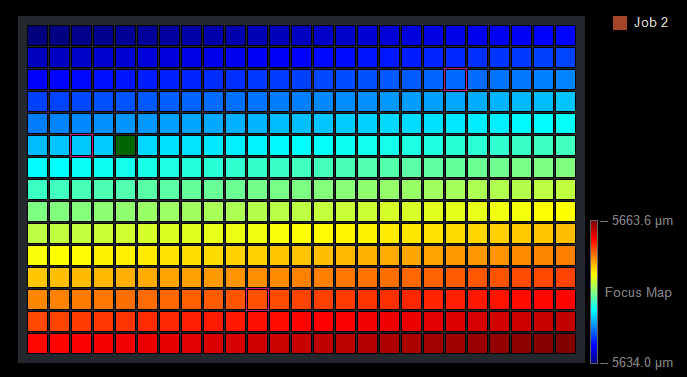

In [4]:
display.Image('Capture.PNG')

In [7]:
cam.start_scan()

OrderedDict([('cli', 'python-leicacam'), ('app', 'matrix'), ('cmd', 'startscan')])

In [5]:
relpath = cam.wait_for('relpath')

In [4]:
#exp = relpath['relpath'].split('\\')[2]
exp = 'experiment--2015_04_20_20_18_49'
path = r'D:\MatrixScreenerImages\3.3.0_9757\ '.strip()

In [5]:
from leicaexperiment import Experiment

In [6]:
experiment = Experiment(path + exp)

In [7]:
cam.wait_for('inf', 'scanfinished')

KeyboardInterrupt: 

In [8]:
experiment.compress(delete_tif=True);
from PIL import Image
for i in experiment.images:
    img = Image.open(i)
    img = img.rotate(270)
    img.save(i)

In [11]:
experiment.stitch()

['D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_20_20_18_49\\stitched--U00--V00--C00--Z00.png']

In [12]:
from leicaexperiment.experiment import stitch_macro

In [13]:
stitch_macro(experiment.wells[0])

(['D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_20_20_18_49\\slide--S00\\chamber--U00--V00\\stitched--U00--V00--C00--Z00.png'],
 ['run("Grid/Collection stitching", "type=[Filename defined position] order=[Defined by filename         ] grid_size_x=25 grid_size_y=15 tile_overlap=10 first_file_index_x=0 first_file_index_y=0 directory=[D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_20_20_18_49\\slide--S00\\chamber--U00--V00] file_names=[field--X{xx}--Y{yy}\\image--L0000--S00--U00--V00--J53--E00--O00--X{xx}--Y{yy}--T0000--Z00--C00.png] output_textfile_name=TileConfiguration.txt fusion_method=[Linear Blending] regression_threshold=0.20 max/avg_displacement_threshold=2.50 absolute_displacement_threshold=3.50 compute_overlap subpixel_accuracy computation_parameters=[Save computation time (but use more RAM)] image_output=[Fuse and display]"); selectWindow("Fused"); saveAs("PNG", "D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_20_20_18_49\\slide--S00\\chamber--

- ** stitch with regression_threshold=0.30 **

In [14]:
%matplotlib inline
from skimage import io

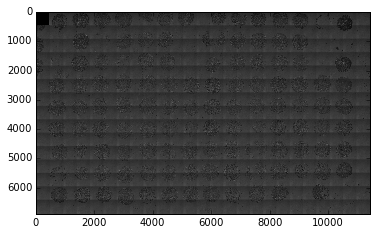

In [15]:
io.imshow(io.imread(experiment.stitched[0]))

In [16]:
from leicaautomator import find_spots

C:\Miniconda3\lib\site-packages\skimage\viewer\utils\core.py:11: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warnings.warn("Recommended matplotlib backend is `Agg` for full "


In [17]:
labels, regions = find_spots(experiment)

Well distance x in microns: 1782.50265172
Well distance y in microns: 2221.13204329
Well offsets
( well )   x[um], y[um]
-----------------------
( 0,  0)       0,   865
( 0,  1)       0,   333
( 1,  0)    -565,  -865
( 1,  1)    -668,   207
( 1,  1)    -844,  1884
( 1,  2)    -860,  1356
( 1,  3)    -863,   754
( 1,  4)    -599,   299
( 1,  5)    -710,  -234
( 1,  6)    -634,  -804
( 2,  0)    -754, -1000
( 2,  0)    -743,   632
( 2,  1)    -835,   119
( 2,  1)    -792,  1853
( 2,  2)    -815,  1317
( 2,  3)    -796,   758
( 2,  4)    -658,   287
( 2,  5)    -570,  -134
( 2,  6)    -658,  -800
( 3,  0)    -878, -1038
( 3,  0)    -143,   785
( 3,  1)    -917,     4
( 3,  1)   -1058,  1681
( 3,  2)   -1055,  1210
( 3,  3)   -1020,   739
( 3,  4)    -886,   268
( 3,  5)    -855,  -276
( 3,  6)    -706,  -862
( 4,  0)   -1121, -1038
( 4,  1)   -1137,  1202
( 4,  2)   -1007,  1114
( 4,  3)    -930,   869
( 4,  4)    -888,   329
( 4,  5)    -846,  -168
( 4,  6)    -834,  -781
( 5,  0)   -103

C:\Miniconda3\lib\site-packages\skimage\util\dtype.py:107: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


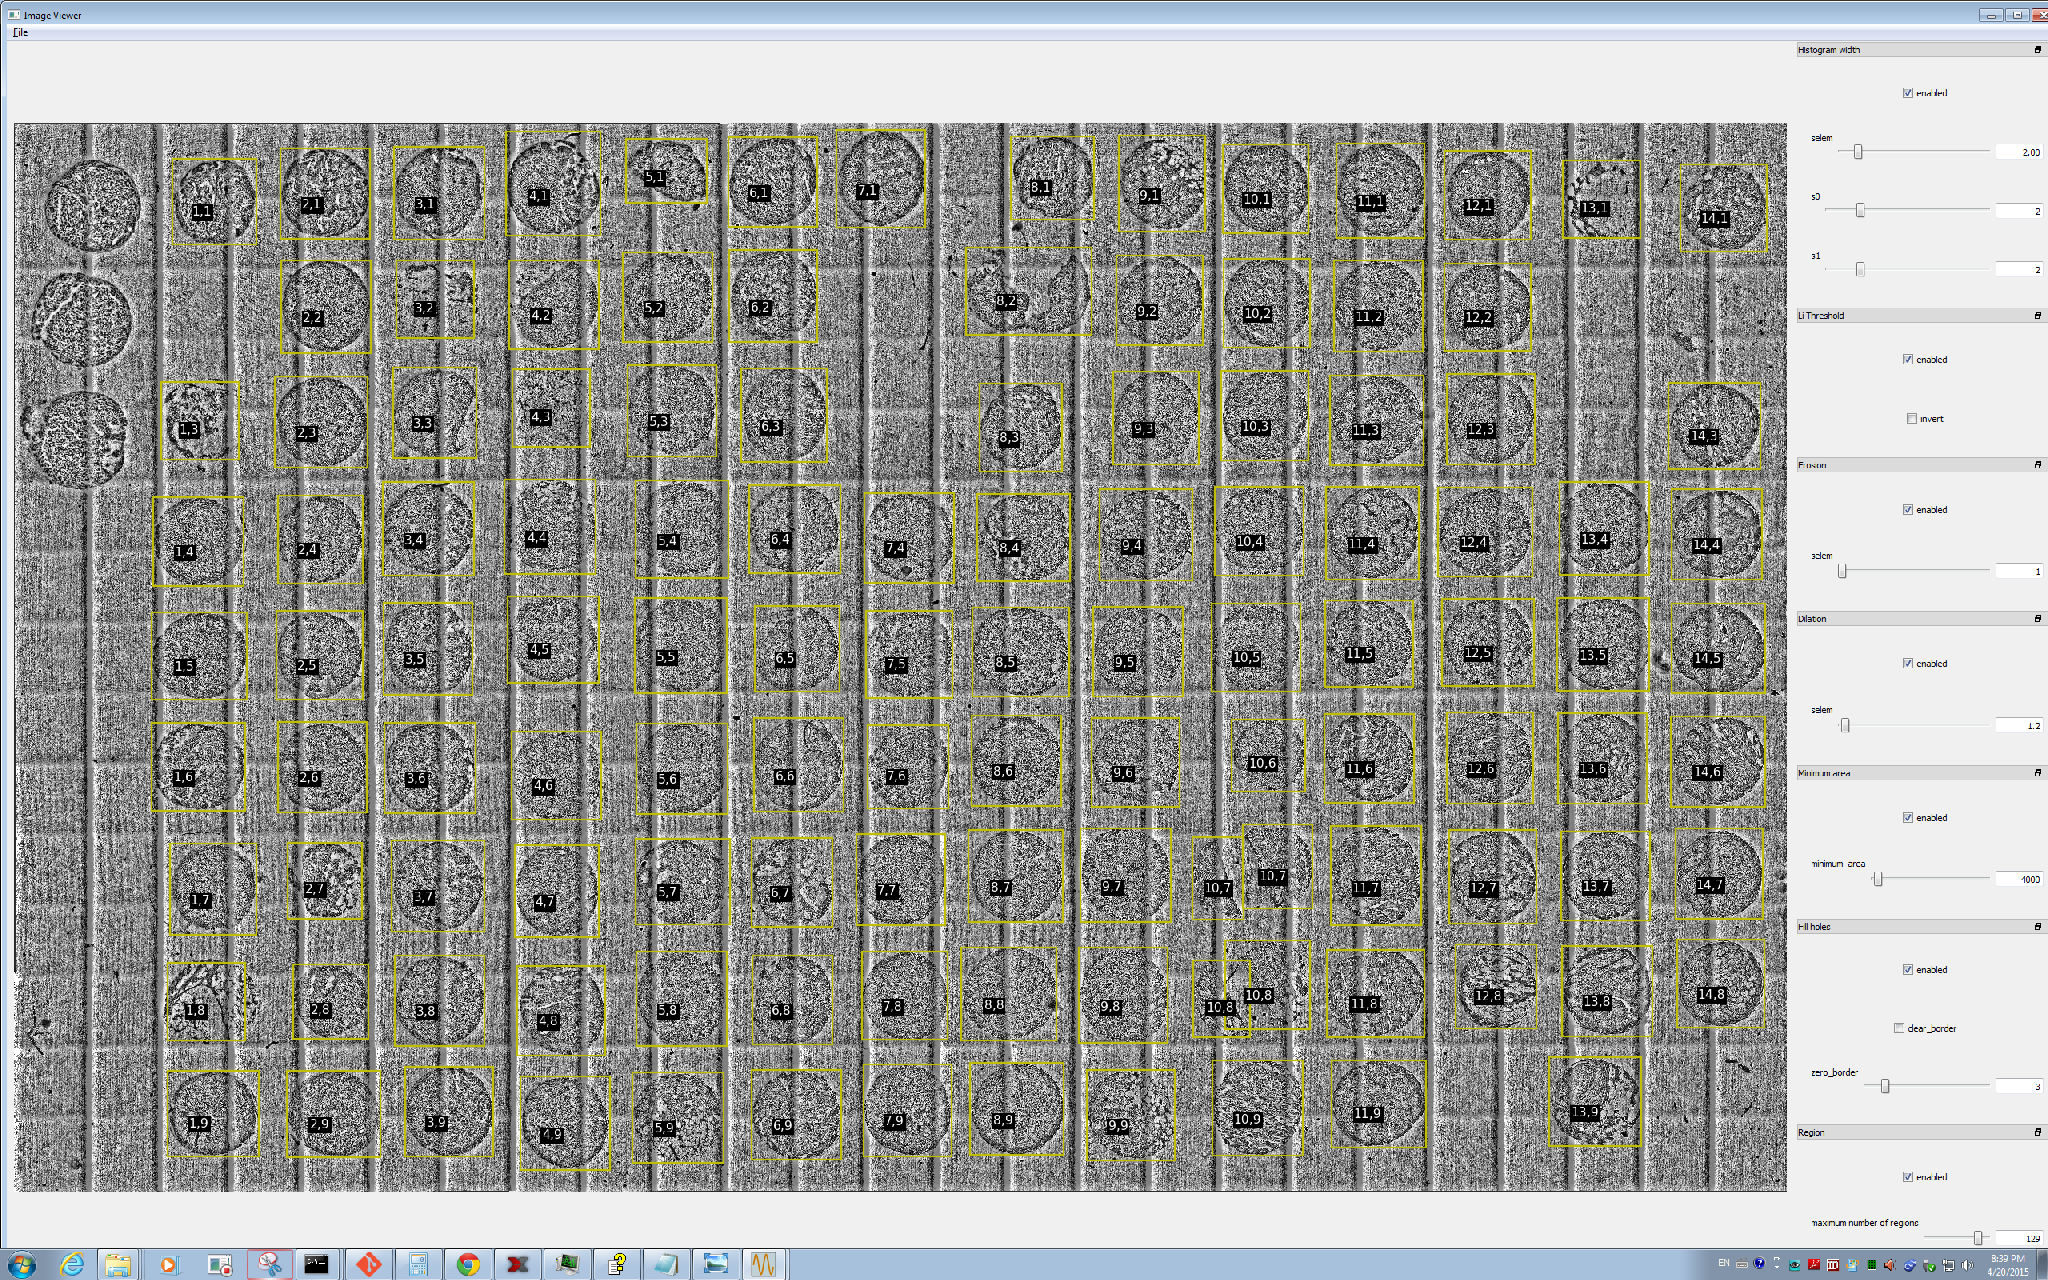

In [12]:
display.Image('Capture.PNG', width=800)

# save regions as comressed pickle

In [13]:
import pickle
import zlib

In [14]:
with open('regions.pickle.gz', 'wb') as f:
    out = pickle.dumps(regions)
    out = zlib.compress(out)
    f.write(out)

In [26]:
with open('regions.pickle.gz', 'rb') as f:
    regions_in = zlib.decompress(f.read())
    regions_in = pickle.loads(regions_in)

In [28]:
region1 = regions_in[0]

In [29]:
region1

In [30]:
region = regions[0]
region

In [33]:
import numpy as np
np.all(region1.image == region.image)

True

# automated scan

In [15]:
from leicascanningtemplate import ScanningTemplate

In [33]:
tmpl_path = r"C:\Users\TCS-User\AppData\Roaming\Leica Microsystems\LAS X\MatrixScreener\ScanningTemplates\ ".strip()

In [251]:
i = 3
region = regions[i]

In [252]:
region.well_x, region.well_y, region.real_x *1e6//1, region.real_y *1e6 //1, region.bbox

(0, 4, 61319.0, 37864.0, (1876, 527, 2208, 892))

In [253]:
stitched = io.imread(experiment.stitched[0])
factor = stitched.shape[0] / labels.shape[0]
factor, stitched.shape, labels.shape

(1.6884765625, (6916, 11461), (4096, 6788))

In [254]:
metadata = experiment.field_metadata(well_x=0, well_y=0, field_x=0, field_y=0)
px_size = float(metadata.Image.Pixels.attrib['PhysicalSizeX'])*1e-6*factor
px_size, px_size*labels.shape[1]*100 # in cm

(3.841201573202056e-06, 2.6074076278895553)

In [255]:
0.187 * 14

2.618

In [256]:
exp_tmpl = ScanningTemplate(experiment.scanning_template)

In [257]:
exp_tmpl.properties.ScanFieldStageDistanceX, exp_tmpl.properties.ScanFieldStageDistanceY

(1050, 1050)

In [258]:
row = [f for f in exp_tmpl.fields if f.attrib['FieldY'] == '1']

In [259]:
len(row)

25

In [260]:
travel = (len(row)-1) * exp_tmpl.properties.ScanFieldStageDistanceX
travel # in um

25200

In [261]:
xs, ys, attrs = experiment.stitch_coordinates()

In [262]:
for n, attr in enumerate(attrs):
    if attr.x == len(row)-1:
        break

In [263]:
px_dist = xs[n]
px_dist

10943.005

In [264]:
px_size = travel / px_dist * 1e-6 * factor
px_size, px_size*labels.shape[1]*100 # in cm

(3.888292966602867e-06, 2.6393732657300264)

In [302]:
y,x,yy,xx = region.bbox

In [266]:
y_size, x_size = px_size*(yy-y)*1e6, px_size*(xx-x)*1e6
y_size, x_size

(1290.9132649121518, 1419.2269328100465)

In [267]:
x_start = exp_tmpl.field(1,1,1,1).FieldXCoordinate
y_start = exp_tmpl.field(1,1,1,1).FieldYCoordinate
x_start, y_start

(0.05927019, 0.03056963)

In [268]:
region.real_x - (x_start + x*px_size)

0.0

In [269]:
region.real_y - (y_start + y*px_size)

0.0

In [270]:
region.real_x = x_start + x*px_size
region.real_y = y_start + y*px_size

In [271]:
tmpl_name = '{ScanningTemplate}leicaautomator'
tmpl = ScanningTemplate(tmpl_path + tmpl_name + str(i%2) + '.xml')

In [272]:
tmpl.properties.ScanFieldStageDistanceX

184

In [273]:
from math import ceil
y_fields = ceil(y_size / tmpl.properties.ScanFieldStageDistanceY)
x_fields = ceil(x_size / tmpl.properties.ScanFieldStageDistanceX)
y_fields, x_fields

(8, 8)

In [274]:
# disable all
for f in tmpl.fields:
    f.attrib['Enabled'] = 'false'

In [275]:
# enable fields
for y in range(y_fields):
    for x in range(x_fields):
        # off by one
        tmpl.field(field_y=y+1, field_x=x+1).attrib['Enabled'] = 'true'

In [276]:
tmpl.move_well(1,1,region.real_x, region.real_y)

- ** enable MP shutter **
- ** switch to 0.9 collector **
- ** apply water **
- ** adjust plane **

In [277]:
cam.get_information('zdrive')['zpos'], cam.get_information()['zpos']

('0.0085379806', '0.0085379806')

In [278]:
# set z manually when zpos reads 0
z = 0.0085381782

In [279]:
field = tmpl.field()

In [280]:
field.FieldZCoordinate

0.0085408

In [281]:
for f in tmpl.fields:
    f.FieldZCoordinate = z

In [282]:
well = tmpl.well()

In [283]:
well.attrib['FieldZCoordinate']

'0.0085408'

In [284]:
str(z)

'0.0085381782'

In [285]:
well.attrib['FieldZCoordinate'] = str(z)

In [286]:
for field in tmpl.fields:
    if field.attrib['IsIndividualAutofocusScanField'] == 'true':
        print(field.attrib['FieldX'], field.attrib['FieldY'])

3 3


In [287]:
for field in tmpl.fields:
    field.attrib['IsIndividualAutofocusScanField'] = 'false'
af_field = tmpl.field(well_x=1, well_y=1, field_x=x_fields//2, field_y=y_fields//2)
af_field.attrib['IsIndividualAutofocusScanField'] = 'true'

In [288]:
tmpl.write()

In [289]:
cam.load_template(tmpl.filename)

OrderedDict([('cli', 'python-leicacam'), ('app', 'matrix'), ('sys', '0'), ('cmd', 'load'), ('fil', '{ScanningTemplate}leicaautomator1')])

In [290]:
cam.send([('cmd', 'autofocusscan')])

51

In [299]:
X = float(cam.get_information()['xpos'])
Y = float(cam.get_information()['ypos'])
X,Y

(0.0614962673, 0.036902154)

In [300]:
region.real_x, region.real_y

(0.06131932039339971, 0.03786406760534698)

In [305]:
diff = region.real_x - X, region.real_y - Y
diff

(-0.00017694690660028517, 0.0009619136053469826)

In [306]:
diff[0] / x, diff[1] / y

(-3.357626311200857e-07, 5.127471243853852e-07)

# try scanning overview again

In [307]:
cam.load_template('leicaautomator-overview')

OrderedDict([('cli', 'python-leicacam'), ('app', 'matrix'), ('sys', '0'), ('cmd', 'load'), ('fil', '{ScanningTemplate}leicaautomator-overview')])

In [308]:
cam.send([('cmd', 'autofocusscan')])

51